In [1]:
import hvplot.pandas
import pandas as pd
import requests
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from pathlib import Path
import seaborn as sns

car_prices = Path("/Users/rociocuao/Downloads/car_prices.csv")
prices_df = pd.read_csv("/Users/rociocuao/Downloads/car_prices.csv")
prices_df.head(5)
 

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)


In [2]:
missing_values_count = prices_df.isnull().sum()
missing_values_count[0:10]

year            0
make            0
model           0
trim            0
body            0
transmission    0
vin             0
state           0
condition       0
odometer        0
dtype: int64

In [3]:
total_cells = np.product(prices_df.shape)
total_missing = missing_values_count.sum()
percent_missing = (total_missing/total_cells)*100
print(percent_missing)

0.0


In [4]:
prices_df_filled = prices_df.fillna(0)
print (prices_df_filled)

        year    make                model         trim       body  \
0       2015     Kia              Sorento           LX        SUV   
1       2015     Kia              Sorento           LX        SUV   
2       2014     BMW             3 Series   328i SULEV      Sedan   
3       2015   Volvo                  S60           T5      Sedan   
4       2014     BMW  6 Series Gran Coupe         650i      Sedan   
...      ...     ...                  ...          ...        ...   
472320  2011     BMW             5 Series         528i      Sedan   
472321  2012     Ram                 2500  Power Wagon   Crew Cab   
472322  2012     BMW                   X5    xDrive35d        SUV   
472323  2015  Nissan               Altima        2.5 S      sedan   
472324  2014    Ford                F-150          XLT  SuperCrew   

       transmission                vin state  condition  odometer  color  \
0         automatic  5xyktca69fg566472    ca        5.0   16639.0  white   
1         automatic

In [5]:
prices_df_cleaned = prices_df.dropna()
print(prices_df_cleaned)

        year    make                model         trim       body  \
0       2015     Kia              Sorento           LX        SUV   
1       2015     Kia              Sorento           LX        SUV   
2       2014     BMW             3 Series   328i SULEV      Sedan   
3       2015   Volvo                  S60           T5      Sedan   
4       2014     BMW  6 Series Gran Coupe         650i      Sedan   
...      ...     ...                  ...          ...        ...   
472320  2011     BMW             5 Series         528i      Sedan   
472321  2012     Ram                 2500  Power Wagon   Crew Cab   
472322  2012     BMW                   X5    xDrive35d        SUV   
472323  2015  Nissan               Altima        2.5 S      sedan   
472324  2014    Ford                F-150          XLT  SuperCrew   

       transmission                vin state  condition  odometer  color  \
0         automatic  5xyktca69fg566472    ca        5.0   16639.0  white   
1         automatic

In [6]:
prices_df_cleaned.to_csv('/Users/rociocuao/Downloads/car_prices.csv', index= False)

prices_df_cleaned

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
472320,2011,BMW,5 Series,528i,Sedan,automatic,wbafr1c53bc744672,fl,39.0,66403.0,white,brown,lauderdale imports ltd bmw pembrok pines,20300.0,22800.0,Tue Jul 07 2015 06:15:00 GMT-0700 (PDT)
472321,2012,Ram,2500,Power Wagon,Crew Cab,automatic,3c6td5et6cg112407,wa,5.0,54393.0,white,black,i -5 uhlmann rv,30200.0,30800.0,Wed Jul 08 2015 09:30:00 GMT-0700 (PDT)
472322,2012,BMW,X5,xDrive35d,SUV,automatic,5uxzw0c58cl668465,ca,48.0,50561.0,black,black,financial services remarketing (lease),29800.0,34000.0,Wed Jul 08 2015 09:30:00 GMT-0700 (PDT)
472323,2015,Nissan,Altima,2.5 S,sedan,automatic,1n4al3ap0fc216050,ga,38.0,16658.0,white,black,enterprise vehicle exchange / tra / rental / t...,15100.0,11100.0,Thu Jul 09 2015 06:45:00 GMT-0700 (PDT)


In [7]:
prices_df_cleaned = pd.read_csv('/Users/rociocuao/Downloads/car_prices.csv')
prices_df_cleaned.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)


In [8]:
prices_df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 472325 entries, 0 to 472324
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          472325 non-null  int64  
 1   make          472325 non-null  object 
 2   model         472325 non-null  object 
 3   trim          472325 non-null  object 
 4   body          472325 non-null  object 
 5   transmission  472325 non-null  object 
 6   vin           472325 non-null  object 
 7   state         472325 non-null  object 
 8   condition     472325 non-null  float64
 9   odometer      472325 non-null  float64
 10  color         472325 non-null  object 
 11  interior      472325 non-null  object 
 12  seller        472325 non-null  object 
 13  mmr           472325 non-null  float64
 14  sellingprice  472325 non-null  float64
 15  saledate      472325 non-null  object 
dtypes: float64(4), int64(1), object(11)
memory usage: 57.7+ MB


In [9]:
missing_values_count = prices_df_cleaned.isnull().sum()
missing_values_count [0:10]

year            0
make            0
model           0
trim            0
body            0
transmission    0
vin             0
state           0
condition       0
odometer        0
dtype: int64

In [10]:
top_makes = prices_df_cleaned['make'].value_counts().head(5)
top_models = prices_df_cleaned['model'].value_counts().head(5)
top_colors = prices_df_cleaned['color'].value_counts().head(5)



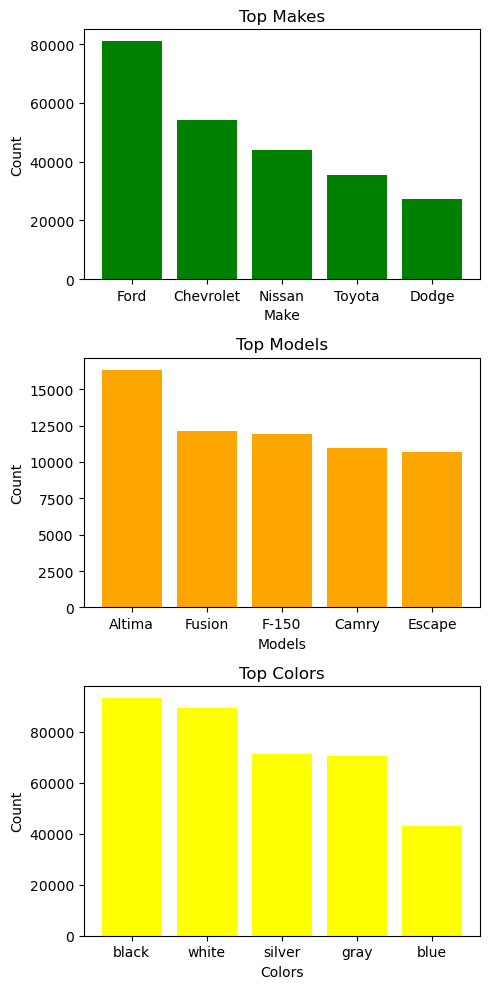

In [11]:
fig, axes = plt.subplots(nrows=3,ncols=1,figsize=(5,10))

axes[0].bar(top_makes.index,top_makes.values, color='green')
axes[0].set_title('Top Makes')
axes[0].set_xlabel('Make')
axes[0].set_ylabel('Count')

axes[1].bar(top_models.index,top_models.values, color='orange')
axes[1].set_title('Top Models')
axes[1].set_xlabel('Models')
axes[1].set_ylabel('Count')

axes[2].bar(top_colors.index,top_colors.values, color='yellow')
axes[2].set_title('Top Colors')
axes[2].set_xlabel('Colors')
axes[2].set_ylabel('Count')



plt.tight_layout()
plt.show()


In [12]:
#How does the state of a car influence consumers' decisions when purchasing vehicles



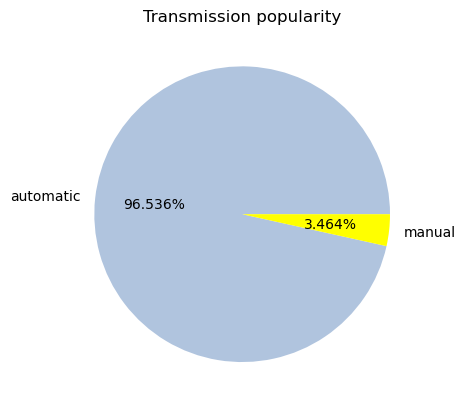

transmission
automatic    455963
manual        16362
Name: count, dtype: int64


In [13]:
#transmission popularity - number of automatic vs. manual vehicles in the data set 
plt.pie(prices_df_cleaned['transmission'].value_counts().values, labels=prices_df_cleaned['transmission'].value_counts().index,
        autopct='%.3f%%',colors=("lightsteelblue","yellow"))
plt.title('Transmission popularity')
plt.show()
print(prices_df_cleaned['transmission'].value_counts())

In [14]:
#Market Trends- Most Popular make and model by year 


In [17]:
#Most popular colors interior / exterior 
popular_df = prices_df_cleaned[['color','interior']].value_counts().reset_index(name='count')
plt.tile()
plt.bar(popular_df)



,color,interior
0,beige,beige
1,beige,black
2,beige,blue
3,beige,brown
4,beige,burgundy
...,...,...
248,—,purple
249,—,red
250,—,silver
251,—,tan


In [18]:
#Are there any correlations between car mileage and price?

correlation = prices_df_cleaned['mmr'].corr(prices_df_cleaned['sellingprice'])
correlation

0.9834931745325893

In [19]:
#Comparison between cars selling price and odometer
comparison= prices_df_cleaned[['sellingprice','odometer']]
comparison_df = comparison.groupby(['sellingprice','odometer'], as_index=False).mean()
comparison_df


,sellingprice,odometer
0,1.0,1.0
1,1.0,31886.0
2,100.0,75389.0
3,100.0,90335.0
4,100.0,94937.0
...,...,...
467041,169500.0,14316.0
467042,171500.0,7852.0
467043,173000.0,5277.0
467044,183000.0,12116.0


In [21]:
#Calculate the profit by model 


In [22]:
#Median selling price based of make of car 



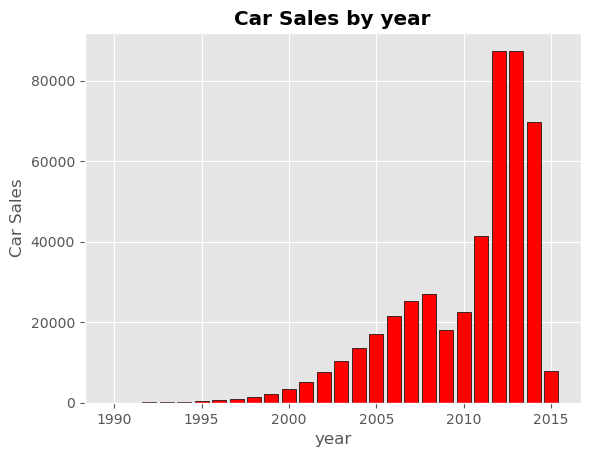

In [24]:
#compare cars sales against the year it was sold in 
year_sales = prices_df_cleaned['year'].value_counts().sort_index()

plt.style.use('ggplot')
plt.title('Car Sales by year', fontweight = 'bold')
plt.bar(year_sales.index, year_sales.values, color = 'red', edgecolor = 'black')
plt.xlabel('year')
plt.ylabel('Car Sales');

In [ ]:
#Most Popular car dealership/sellers for specific states 
popular_df = sns.load.dataset('')